In [5]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [6]:
news = pd.read_csv('raw_analyst_ratings.csv')

In [7]:
news.head()

,Unnamed: 0,headline,url,publisher,date,stock
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A


In [8]:
news.headline.str.len()

,headline
0,39
1,42
2,29
3,44
4,87
...,...
27262,100
27263,48
27264,68
27265,255


In [9]:
# Group by publisher and count articles
publisher_counts = news.groupby('publisher').size().reset_index(name='publisher_count')

print(publisher_counts)

news = news.drop(columns=['Unnamed: 0'], errors='ignore')
news = news.merge(publisher_counts, on='publisher', how='left')

                     publisher  publisher_count
0                  Abe Raymond               32
1                     Abhi Rao                1
2           Above Average Odds                3
3              Activist Stocks                1
4                  Adam Sarhan                1
..                         ...              ...
364                 tradermark               48
365    vishwanath@benzinga.com               48
366  vivek.proactive@gmail.com                4
367             wallstreet1928                1
368                  webmaster              457

[369 rows x 2 columns]


In [10]:
news.head()

,headline,url,publisher,date,stock,publisher_count
0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A,48.0
1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A,48.0
2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A,3959.0
3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A,3959.0
4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A,546.0


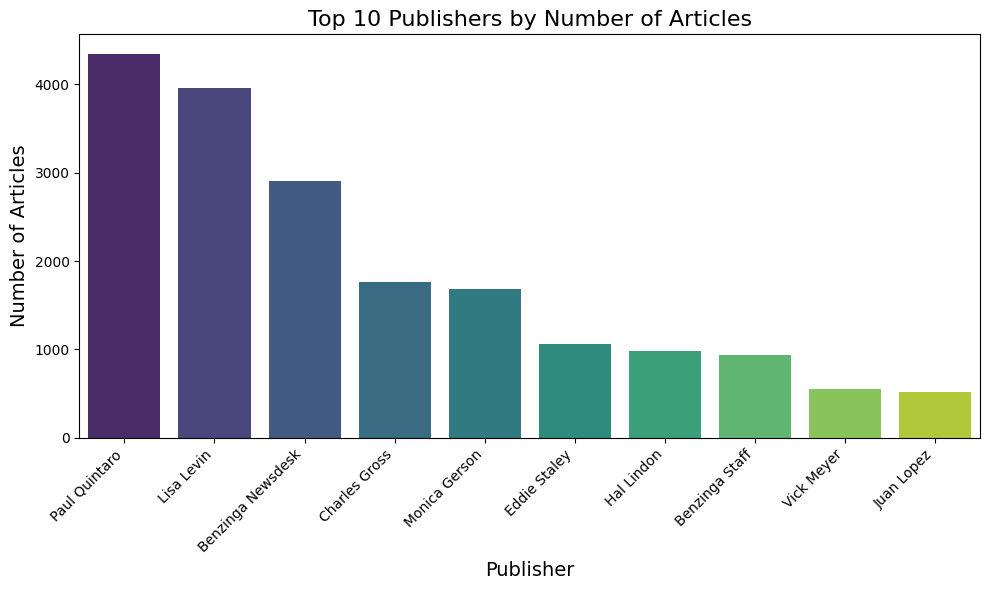

In [11]:
top_publishers = publisher_counts.nlargest(10, 'publisher_count')

plt.figure(figsize=(10, 6))
sns.barplot(x='publisher', y='publisher_count', data=top_publishers, palette='viridis')

# titles and labels
plt.title('Top 10 Publishers by Number of Articles', fontsize=16)
plt.xlabel('Publisher', fontsize=14)
plt.ylabel('Number of Articles', fontsize=14)
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

In [12]:
news['date'] = pd.to_datetime(news['date'], errors='coerce')

In [13]:
news.isnull().sum()

,0
headline,0
url,0
publisher,1
date,26377
stock,1
publisher_count,1


In [14]:
news['year'] = news['date'].dt.year
news['month'] = news['date'].dt.month
news['day'] = news['date'].dt.day
news['day_of_week'] = news['date'].dt.day_name()

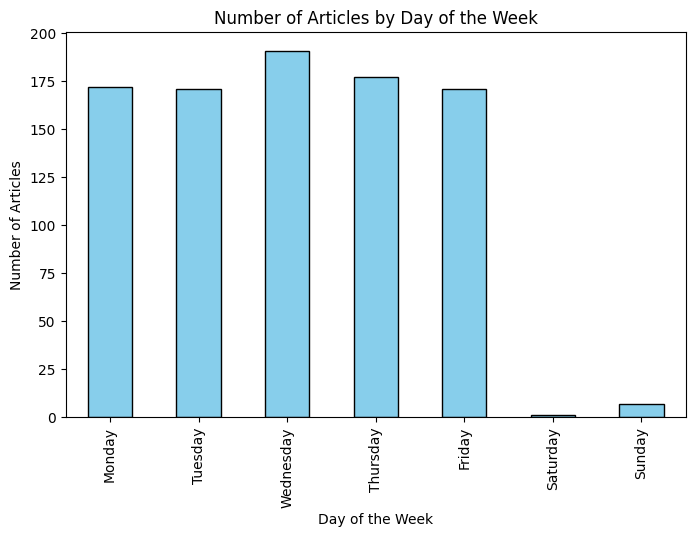

In [15]:
day_counts = news['day_of_week'].value_counts()
day_counts = day_counts.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

plt.figure(figsize=(8, 5))
day_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Number of Articles by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Articles')
plt.show()

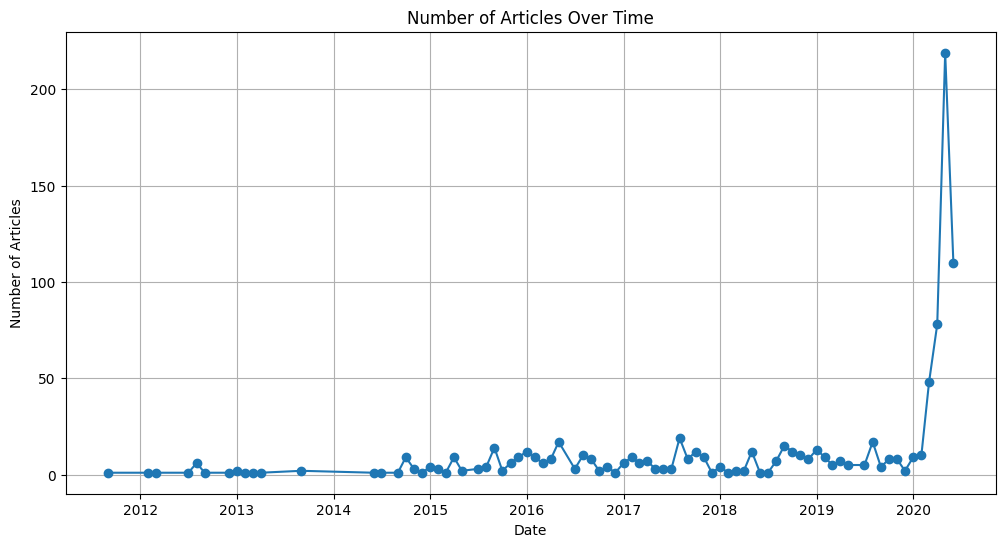

In [16]:
# News frequency over years
monthly_counts = news.groupby(['year', 'month']).size().reset_index(name='article_count')
monthly_counts['date'] = pd.to_datetime(monthly_counts[['year', 'month']].assign(day=1))

plt.figure(figsize=(12, 6))
plt.plot(monthly_counts['date'], monthly_counts['article_count'], marker='o', linestyle='-')
plt.title('Number of Articles Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Articles')
plt.grid(True)
plt.show()

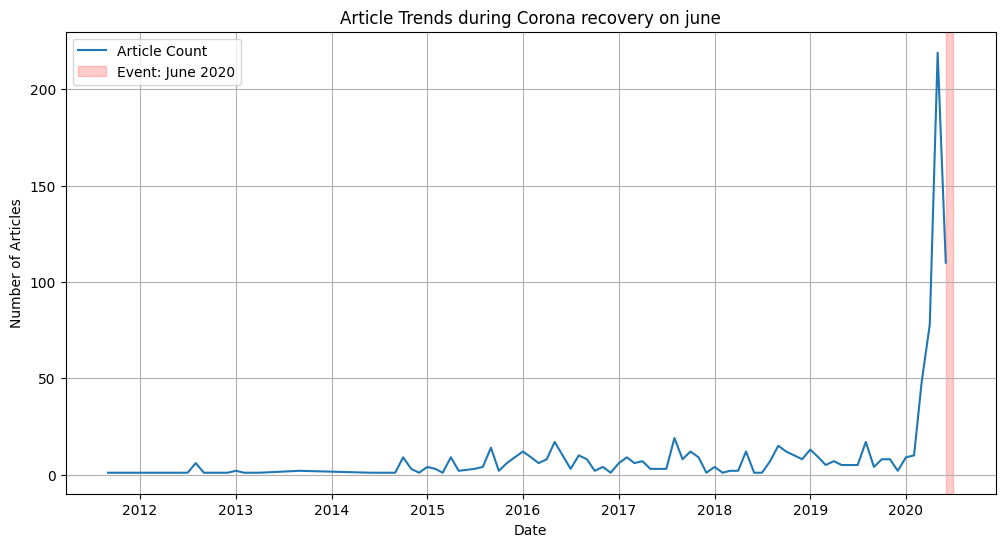

In [17]:
# events
plt.figure(figsize=(12, 6))
plt.plot(monthly_counts['date'], monthly_counts['article_count'], label='Article Count')
plt.axvspan('2020-06-01', '2020-06-30', color='red', alpha=0.2, label='Event: June 2020')
plt.title('Article Trends during Corona recovery on june')
plt.xlabel('Date')
plt.ylabel('Number of Articles')
plt.legend()
plt.grid(True)
plt.show()


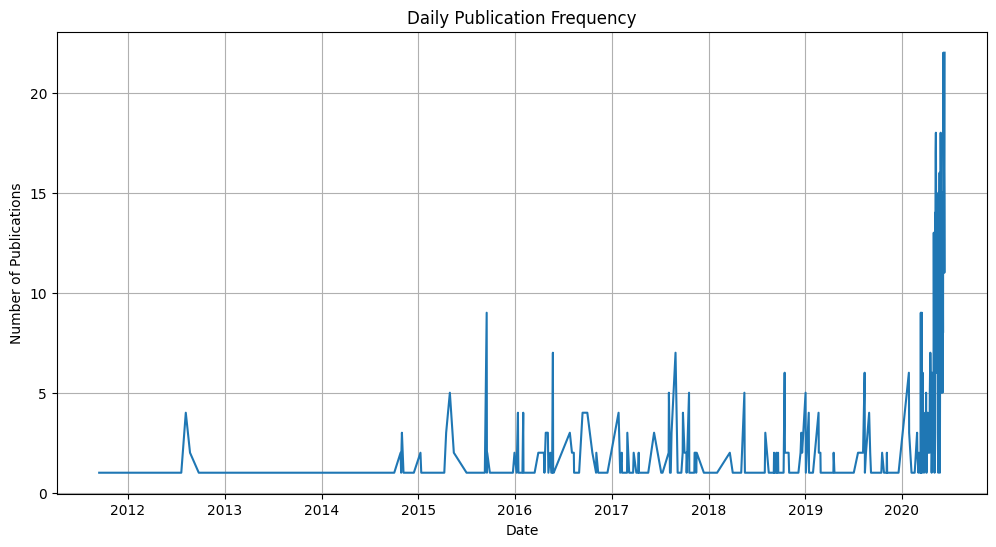

In [19]:
daily_publications = news.groupby(news['date'].dt.date).size()

    # Plot daily publication frequency
plt.figure(figsize=(12, 6))
daily_publications.plot(kind='line', title='Daily Publication Frequency')
plt.xlabel('Date')
plt.ylabel('Number of Publications')
plt.grid()
plt.show()

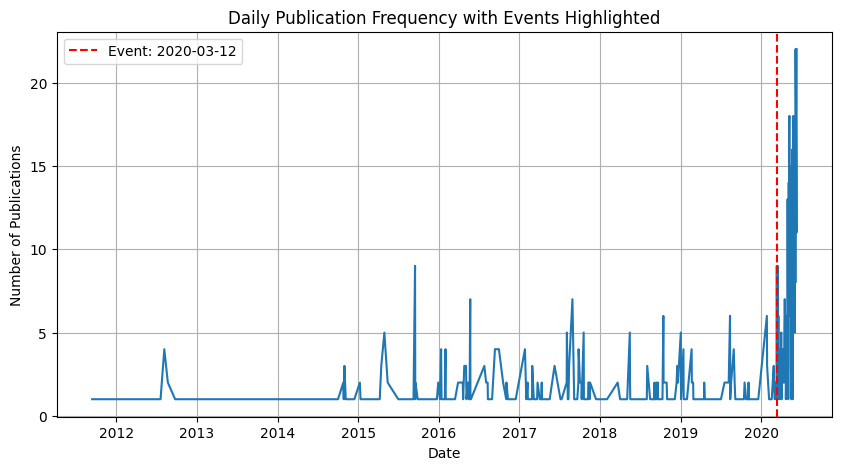

In [22]:
important_dates = ['2020-03-12'] # march when the corona started spreading in america
plt.figure(figsize=(10, 5))
daily_publications.plot(kind='line', title='Daily Publication Frequency with Events Highlighted')
for event in important_dates:
    plt.axvline(pd.to_datetime(event), color='red', linestyle='--', label=f'Event: {event}')
    plt.xlabel('Date')
    plt.ylabel('Number of Publications')
    plt.legend()
    plt.grid()
    plt.show()